In [2]:
# Imports e funções 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

MAIN_FOLDER_PATH = "D:\\98_phD_Files\\Projeto 008 - Classificador entre K rotas MSCL Combinado\\src-java\\data\\"

def getResultsDataFrame(dataDict: dict) -> pd.DataFrame:
    PATH: str = f"{MAIN_FOLDER_PATH}{dataDict['Folder']}\\results.txt"

    return pd.read_csv(PATH, sep=';')

def getMeanSameNetworkLoad(dataFrame: pd.DataFrame) -> pd.DataFrame:

    columns = ['networkLoad','probabilityBlocking', 'executionTime', 'MSCLCycle']

    dataFrameClean = dataFrame[columns]

    return dataFrameClean.groupby('networkLoad').mean()

def plotResults(datas: list, type: str, axis) -> None:

    if type == "executionTime":
        for result in datas:
            df_mean = getMeanSameNetworkLoad(getResultsDataFrame(result))

            # Converte o tempo de execução de milissegundos para segundos
            axis.plot(df_mean.index, df_mean[type] / 1000, color=result['Color'], linestyle=result['Line'], marker=result['Mark'], label=result['Label'])
    else:
        for result in datas:
            df_mean = getMeanSameNetworkLoad(getResultsDataFrame(result))

            axis.plot(df_mean.index, df_mean[type], color=result['Color'], linestyle=result['Line'], marker=result['Mark'], label=result['Label'])

    if type == "probabilityBlocking":

        axis.set_yscale('log')
        axis.set_ylabel("Probabilidade de Bloqueio")
        axis.set_xlabel("Carga da Rede (Erlangs)")
        #axis.set_title("Probabilidade de Bloqueio x Carga da Rede")
        axis.grid(axis='both', which='both')

        plt.yticks([1e-1, 1e-2, 1e-3, 1e-4], [r'$10^{-1}$', r'$10^{-2}$', r'$10^{-3}$', r'$10^{-4}$'])

        # Uma única legenda para todos os gráficos centralizada na parte superior da figura
        axis.legend(loc='upper center', bbox_to_anchor=(0.5, 1.25), fancybox=True, shadow=False, ncol=3, fontsize=12)
        
    elif type == "executionTime":
        
        axis.set_ylabel("Tempo de Execução (s)")
        axis.set_xlabel("Carga da Rede (Erlangs)")
        #axis.set_title("Tempo de Execução x Carga da Rede")
        axis.grid(axis='both', which='both')


    

    #ax.legend(loc='upper center', bbox_to_anchor=(1.025, 1.28), fancybox=True, shadow=False, ncol=3, fontsize=12)
    

    # plt.grid(axis='y', which='both')

    # if not doubleFig:
    #     plt.show()
    #     plt.close(fig)

MARKER: dict = {
    "k=1": "o",
    "k=2": "s",
    "k=3": "d",
    "k=4": "p",
    "k=5": "h",
}

LINES: dict = {
    "RSA" : ":",
    "MSCLS" : "-.",
    "MSCLC" : "--",
    "SAR" : "-",
}

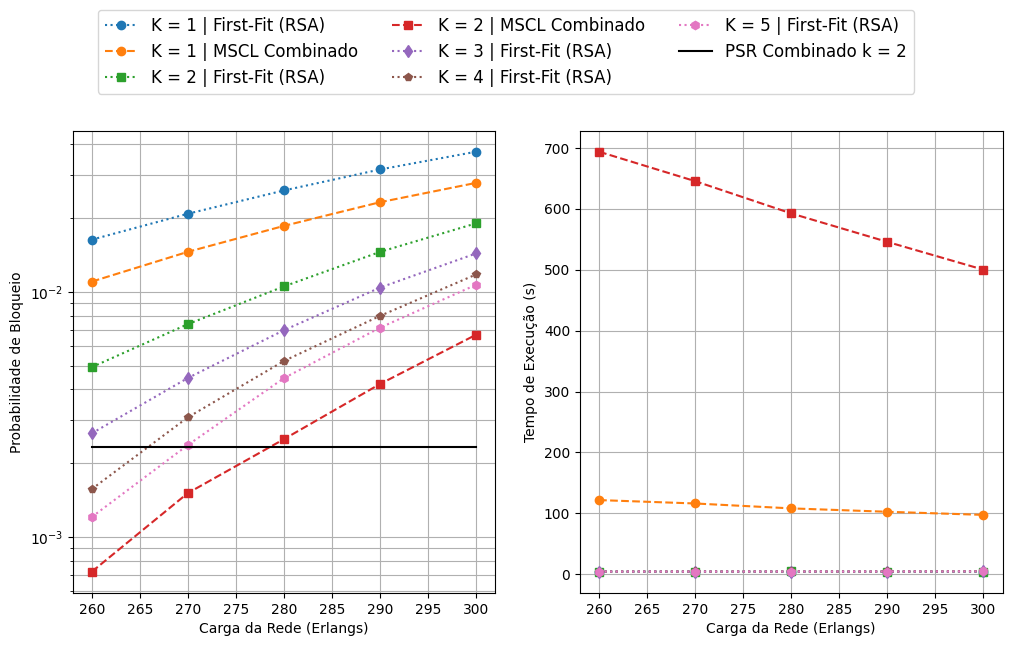

In [3]:
DATA_NSFNet: list = [
    {
        "Folder": "2024-02-01_13-59-24_NSFNet_YEN_FirstFit_Routing_SA_ITwoCollectData_DONE",
        "Obs": "K = 1 | First-Fit (RSA)",
        "Label": "K = 1 | First-Fit (RSA)", "Color": None, "Mark": MARKER['k=1'], "Line": LINES['RSA'],
    },
    {
        "Folder": "2024-02-01_13-39-54_NSFNet_MSCLSequencial_MSCL_None_ITwoCollectData_DONE",
        "Obs": "K = 1 | MSCL Combinado",
        "Label": "K = 1 | MSCL Combinado", "Color": None, "Mark": MARKER['k=1'], "Line": LINES['MSCLC'],
    },

    {
        "Folder": "2024-02-01_14-01-50_NSFNet_YEN_FirstFit_Routing_SA_ITwoCollectData_DONE",
        "Obs": "K = 2 | First-Fit (RSA)",
        "Label": "K = 2 | First-Fit (RSA)", "Color": None, "Mark": MARKER['k=2'], "Line": LINES['RSA'],
    },
    {
        "Folder": "2024-02-01_14-06-41_NSFNet_MSCLCombinado_MSCL_None_ITwoCollectData_DONE",
        "Obs": "K = 2 | MSCL Combinado",
        "Label": "K = 2 | MSCL Combinado", "Color": None, "Mark": MARKER['k=2'], "Line": LINES['MSCLC'],
    },

    {
        "Folder": "2024-02-01_14-02-50_NSFNet_YEN_FirstFit_Routing_SA_ITwoCollectData_DONE",
        "Obs": "K = 3 | First-Fit (RSA)",
        "Label": "K = 3 | First-Fit (RSA)", "Color": None, "Mark": MARKER['k=3'], "Line": LINES['RSA'],
    },

    {
        "Folder": "2024-02-01_14-03-22_NSFNet_YEN_FirstFit_Routing_SA_ITwoCollectData_DONE",
        "Obs": "K = 4 | First-Fit (RSA)",
        "Label": "K = 4 | First-Fit (RSA)", "Color": None, "Mark": MARKER['k=4'], "Line": LINES['RSA'],
    },
    
    {
        "Folder": "2024-02-01_14-04-27_NSFNet_YEN_FirstFit_Routing_SA_ITwoCollectData_DONE",
        "Obs": "K = 5 | First-Fit (RSA)",
        "Label": "K = 5 | First-Fit (RSA)", "Color": None, "Mark": MARKER['k=5'], "Line": LINES['RSA'],
    },
]

# Gráfico de probabilidade de Bloqueio para NSFNet

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Sem ordenar
plt.subplot(1,2,1) # Linhas, colunas, número do plot

plotResults(DATA_NSFNet, 'probabilityBlocking', axis=ax[0])

ax[0].semilogy([260, 270, 280, 290, 300], [0.002318] * 5, color='black', linestyle='-', label='PSR Combinado k = 2')

#  Adiciona a legenda fora do gráfico a direita
ax[0].legend(loc='upper center', bbox_to_anchor=(1.025, 1.28), fancybox=True, shadow=False, ncol=3, fontsize=12)

plotResults(DATA_NSFNet, 'executionTime', axis=ax[1])

# Adiciona um título para a figura na parte superior centralizada próximo ao topo
#plt.suptitle("NSFNet com 128 slots por enlace")

plt.show()


In [31]:
FOLDER = "2024-02-02_10-18-03_NSFNet_MSCLCombinado_MSCL_None_PSO_DONE"

data_generation = pd.read_csv(f"{MAIN_FOLDER_PATH}{FOLDER}\\PSO_cost.csv", sep=';')

In [32]:
data_generation

,Generation,Particle_0,Particle_1,Particle_2,Particle_3,Particle_4,Particle_5,Particle_6,Particle_7,Particle_8,Particle_9
0,0,0.00744,0.00724,0.00718,0.00668,0.00664,0.00704,0.00714,0.00714,0.00792,0.00692
1,1,0.00684,0.00748,0.00698,0.00724,0.00730,0.00748,0.00716,0.00676,0.00724,0.00752
2,2,0.00724,0.00708,0.00742,0.00720,0.00698,0.00718,0.00690,0.00744,0.00764,0.00782
3,3,0.00740,0.00742,0.00720,0.00768,0.00716,0.00724,0.00690,0.00706,0.00710,0.00674
4,4,0.00696,0.00714,0.00788,0.00700,0.00718,0.00738,0.00734,0.00698,0.00716,0.00722
5,5,0.00762,0.00774,0.00726,0.00706,0.00730,0.00694,0.00734,0.00732,0.00712,0.00742
6,6,0.00736,0.00696,0.00702,0.00752,0.02320,0.00704,0.00736,0.00696,0.00728,0.00766


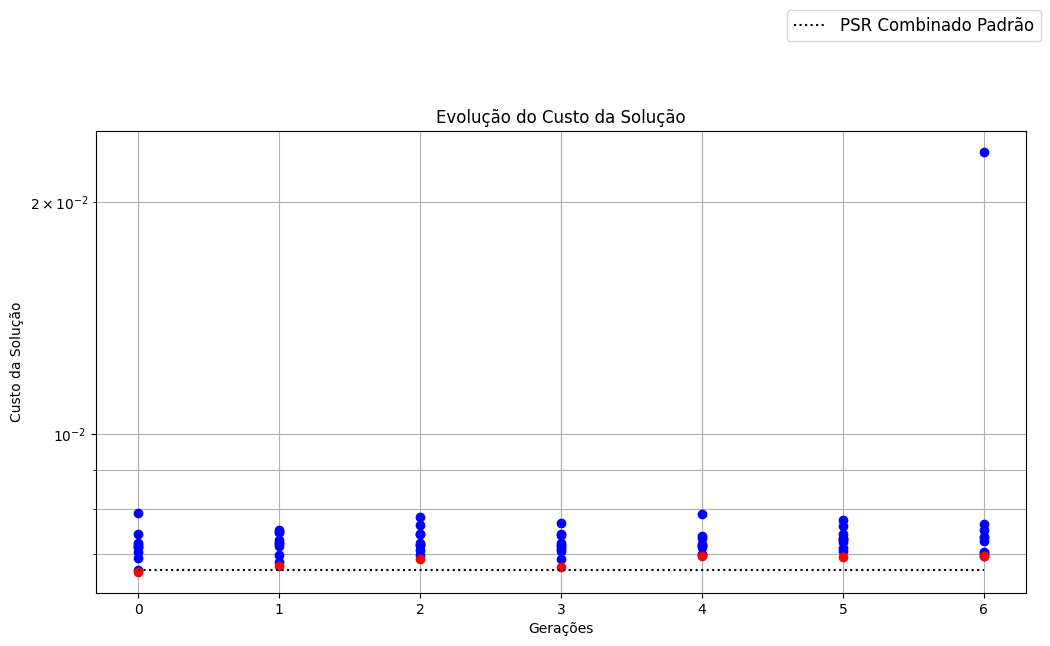

In [34]:
# Cria um gráfico de pontos para a geração de soluções do PSO
PB_MSCL_Combinado = 0.00668

fig, ax = plt.subplots(1, 1, figsize=(12, 6))

generation = data_generation['Generation'].values

# Percorre o dataframe e plota os valores de custo da solução para cada geração com um ponto. a cor da melhor colução deve ser diferente
for index, row in data_generation.iterrows():
    
    pB_points = sorted(row.values[1:], reverse=True)

    for pb_index, pb in enumerate(pB_points):
        
        if pb_index == len(pB_points) - 1:
            ax.semilogy(generation[index], pb, marker='o', color='red', linestyle='None')
        else:   
            ax.semilogy(generation[index], pb, marker='o', color='blue', linestyle='None')

# Linha com o MSCL Combinado padrão
ax.semilogy(generation, [PB_MSCL_Combinado] * len(generation), color='black', linestyle=':', label='PSR Combinado Padrão')      


# Adiciona a legenda fora do gráfico a direita
ax.legend(loc='upper right', bbox_to_anchor=(1.025, 1.28), fancybox=True, shadow=False, ncol=3, fontsize=12)

# Os ticks do eixo x são os valores das gerações em inteiros
ax.set_xticks(generation)

ax.set_ylabel("Custo da Solução")
ax.set_xlabel("Gerações")
ax.set_title("Evolução do Custo da Solução")
ax.grid(axis='both', which='both')

plt.show()